In [1]:
import itertools

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot styling.
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # Single-column figure.

In [3]:
def get_network_group_sample_type_counts(gnps_network, sample_types,
                                         selected_groups):
    gnps_network_selected = gnps_network[(gnps_network[selected_groups] > 0)
                                         .all(axis=1)]
    peak_filenames = set(itertools.chain.from_iterable(
        gnps_network_selected['UniqueFileSources'].str.split('|').tolist()))
    return sample_types.reindex(peak_filenames).value_counts()

### Load data 

In [4]:
metadata = pd.read_csv(
    '../data/11442_foodomics_multiproject_metadata_20200211_noemptycells.txt',
    sep='\t')
# First row is empty.
metadata = metadata.drop(index=0)
# Remove trailing whitespace.
metadata = metadata.apply(lambda col: col.str.strip()
                          if col.dtype == 'object' else col)
# Harmonize the empo_3 column.
metadata['empo_3'] = metadata['empo_3'].str.replace ('-', ' ')

In [5]:
gnps_network = pd.read_csv(
    '../data/METABOLOMICS-SNETS-V2-e0bf255b-view_all_clusters_withID_beta-main.tsv',
    sep='\t')

### Simple foods difference between fecal and plasma

In [6]:
sample_counts_fecal = get_network_group_sample_type_counts(
    gnps_network,
    (metadata[metadata['simple_complex'] == 'simple']
     [['filename', 'sample_type_group1']].set_index('filename').squeeze()),
    ['G1', 'G4']).rename('fecal-GFOP exclusive')
sample_counts_plasma = get_network_group_sample_type_counts(
    gnps_network,
    (metadata[metadata['simple_complex'] == 'simple']
     [['filename', 'sample_type_group1']].set_index('filename').squeeze()),
    ['G2', 'G4']).rename('plasma-GFOP exclusive')

In [7]:
sample_counts_fecal_plasma = pd.concat(
    [sample_counts_fecal, sample_counts_plasma], axis=1)

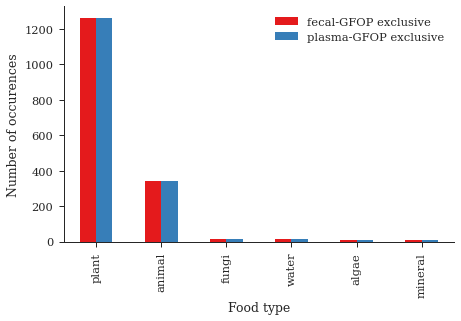

In [8]:
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

sample_counts_fecal_plasma.plot.bar(ax=ax)

ax.set_xlabel('Food type')
ax.set_ylabel('Number of occurences')

sns.despine()

plt.show()
plt.close()